# Main goal of this copy is to incorporate gridsearchcv and plot the confusion matrix

# Credit Card Fraud Detection Analysis

#### This project is an attempt to solve the accuracy paradox problem caused by imabalanced datasets in the credit card industry domain



## Data Declaration 

#### In this section, we will attempt to declare the data by exploring some basic statistics about our data

#### In the cell below, we import all the necessary libraries and change some settings to our preferences

In [1]:
import pandas as pd
import timeit
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import seaborn as sns
import warnings
import requests
import sklearn

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option("display.max_colwidth", None)



In [2]:
# Read the csv file
df = pd.read_csv('C:/users/asadn/desktop/FYP/myapp-heroku/creditcard.csv')

### In the cells below, we try to grab a feel of what our data looks like and exploring basic statistics


### df.head() returns the first 5 records in the dataset, now we can see the exact values of the features.

#### Keeping in mind the fact that the dataset is PCA transformed according to the description, we can observe that only the Time, Amount and Class features are not transformed using PCA. 


In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### df.describe() gives us some basic statistics about our data

#### Now we can see alot of statistical metrics about our data like mean, standard deviation, minimum and maximum values and more for each feature


In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,1.772925e-15,9.289524e-16,-1.803266e-15,1.674888e-15,1.475621e-15,3.501098e-15,1.392460e-15,-7.466538e-16,4.258754e-16,9.019919e-16,5.126845e-16,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
#Number of features

len(df.columns)

31

### df.dtypes returns all the features and their data types

#### Now we can see that almost the entire 31 features are of type float

In [6]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

### Here we try to find out the number of instances of each class

In [7]:
df.isnull().values.any()

False

In [8]:
fraud=df[df.Class==1]
valid=df[df.Class==0]
outlier_percentage=(df.Class.value_counts()[1]/df.Class.value_counts()[0])*100

In [9]:
print('Fraudulent transactions are: %.3f%%'%outlier_percentage)
print('Fraud Cases: ',len(fraud))
print('Valid Cases: ',len(valid))

Fraudulent transactions are: 0.173%
Fraud Cases:  492
Valid Cases:  284315


([<matplotlib.patches.Wedge at 0x219077a5700>,
 [Text(1.0999838009225849, 0.005969732649226358, 'fraud cases 492'),
  Text(-2.099969073634098, -0.011396919774580815, 'valid cases 284315')])

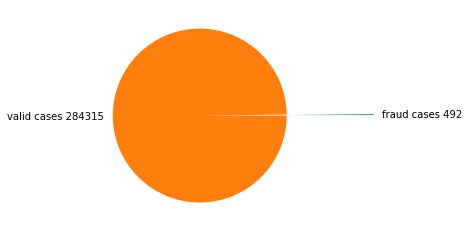

In [10]:
plt.pie([len(fraud), len(valid)], labels=['fraud cases '+str(len(fraud)), 'valid cases '+str(len(valid))], explode=[0, 1])

#### We can observe that there is a huge discrepancy between the number of instances in both classes. This mean that there is a heavy imbalance. Only 0.173% of all transactions are fraudulent

#### There are no null values in the dataset

In [ ]:
fig = px.scatter_matrix(df,width=3000, height=3000)
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightSteelBlue",)
fig.show()

### Below are the boxplots of the features of the dataset

#### Boxplots can assist us in detecting outliers

<AxesSubplot:>

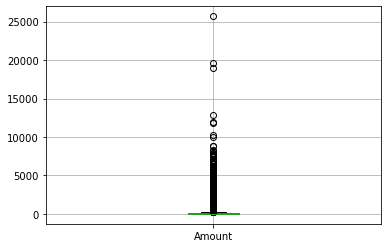

In [8]:
df1 = df[['Amount']].copy()
df1.boxplot()

<AxesSubplot:>

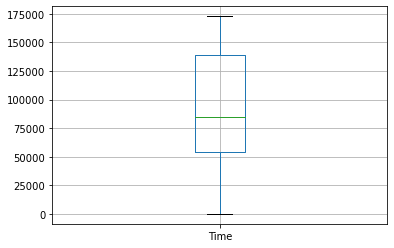

In [9]:
df1 = df[['Time']].copy()
df1.boxplot()

<AxesSubplot:>

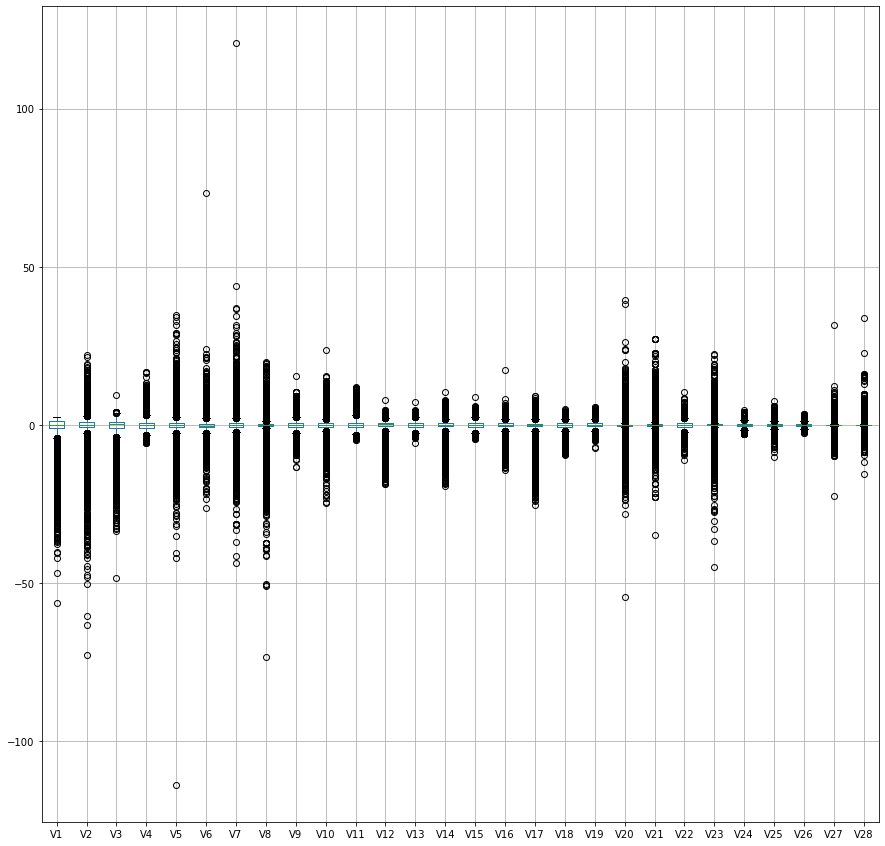

In [10]:
df1 = df.loc[:, ~df.columns.isin(['Amount', 'Time', 'Class'])]
df1.boxplot(figsize=(15,15))

In [64]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,scaled_amount,scaled_time,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.783274,-0.994983,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.269825,-0.994983,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,-0.994972,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,-0.994972,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.670579,-0.994960,0


In [27]:
cln_df = df[outlier_scores > threshold]
len(cln_df)

284473

In [4]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.covariance import EllipticEnvelope

#### We can observe that most of the data falls out of the Inter quartile range for a respective feature. Thus, we can conclude that there are alot of outliers in the data. We should keep this into consideration when we are pre-processing our data.

In [ ]:
df.plot(subplots=True, layout=(7,5), figsize=(20,20))

### Below are the histogram plots for each feature

#### Histograms can assit us in determining the distribution of the data

In [ ]:
df.hist(column=df.columns, figsize=(16,16), layout=(7,5))

#### Why did you Sampled records to make both classes equal in instances and then plot the correlation matrix?

In [ ]:
# X = Test_set.loc[:, df.columns != 'Class']
# y = Test_set.loc[:, df.columns == 'Class']
# X, y = Test_set[:, :-1], Test_set[:, -1]
sns.pairplot(Test_set.sample(10000), hue='Class', diag_kind='kde')

### This code was used in an earlier version to separate the training and test files physically

from sklearn.model_selection import train_test_split

#splitting data into input and output

data = df.values
X, y = data[:, :-1], data[:, -1]

#70 - 25 % train - test split without stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1, shuffle=True, stratify=y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

Training_set = pd.DataFrame(np.column_stack((X_train, y_train)), columns = df.columns)
Test_set = pd.DataFrame(np.column_stack((X_test, y_test)), columns = df.columns)

Training_set.to_csv('Training_set_75.csv', encoding='utf-8', index=False)
Test_set.to_csv('Test_set_25.csv', encoding='utf-8', index=False)

#### Now lets read the separated training and test files

In [3]:
Training_set = pd.read_csv('C:/users/asadn/desktop/FYP/myapp-heroku/jupyter/Training_set_75.csv')
Test_set = pd.read_csv('C:/users/asadn/desktop/FYP/myapp-heroku/jupyter/Test_set_25.csv')

C:\Users\asadn\anaconda3\lib\site-packages\seaborn\axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)
C:\Users\asadn\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


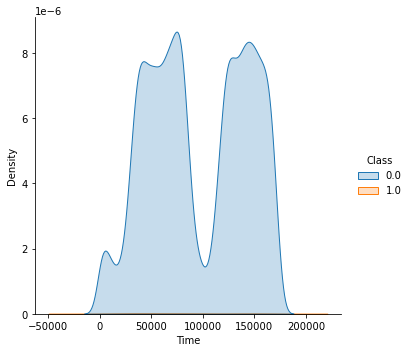

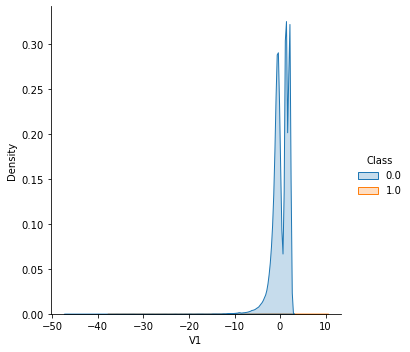

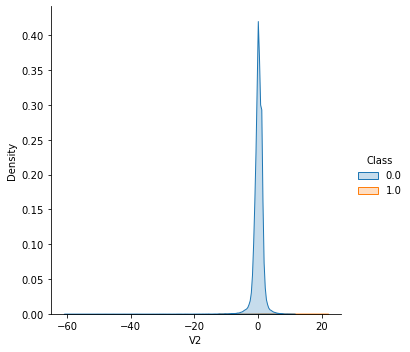

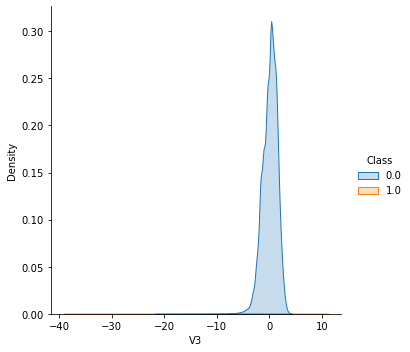

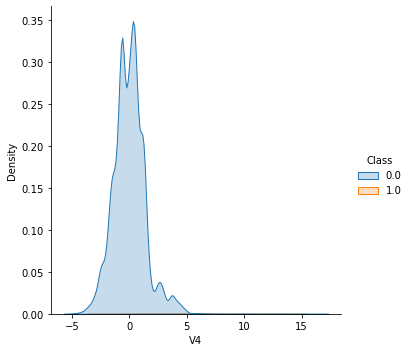

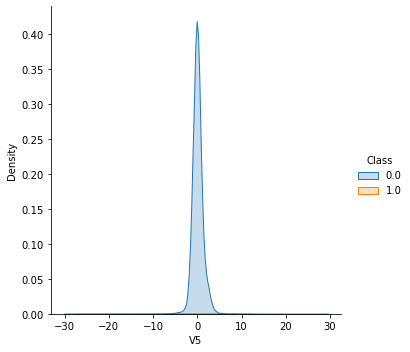

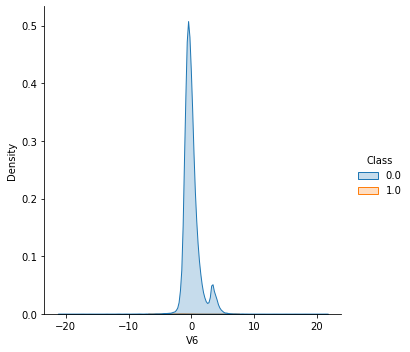

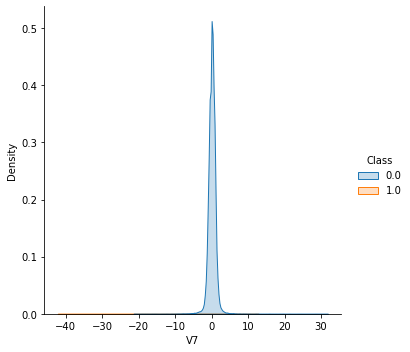

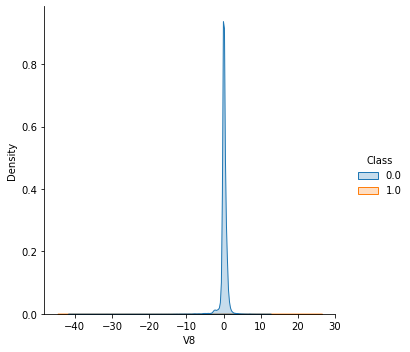

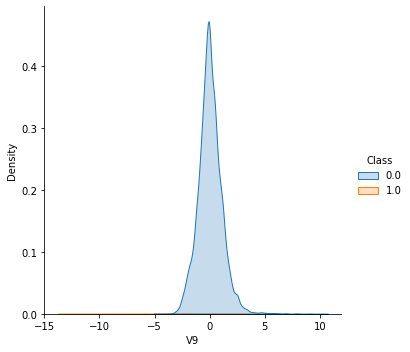

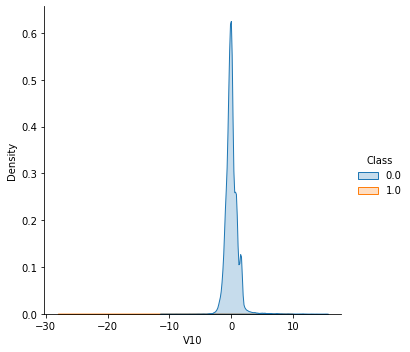

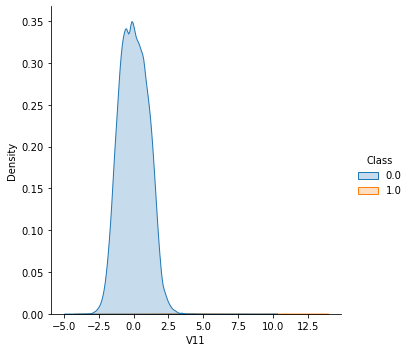

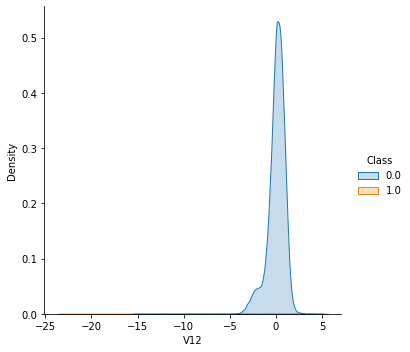

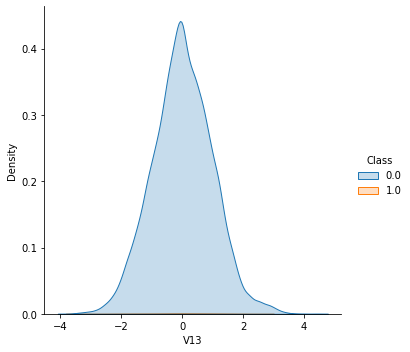

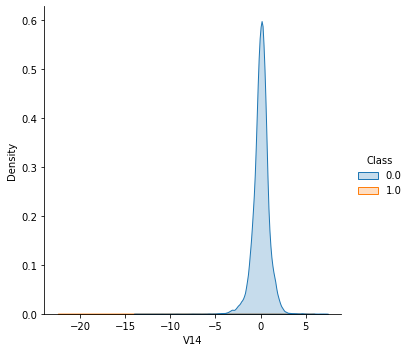

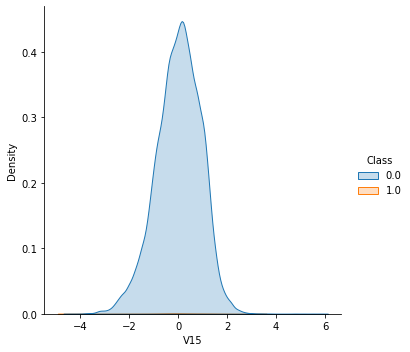

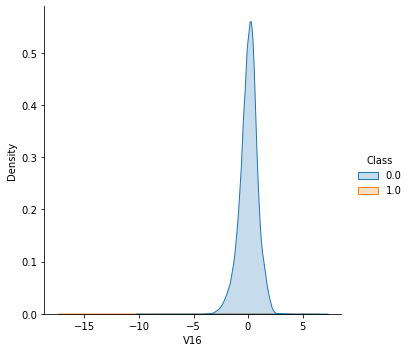

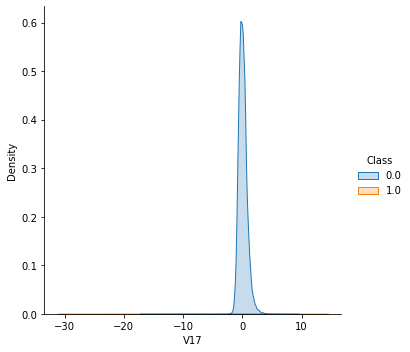

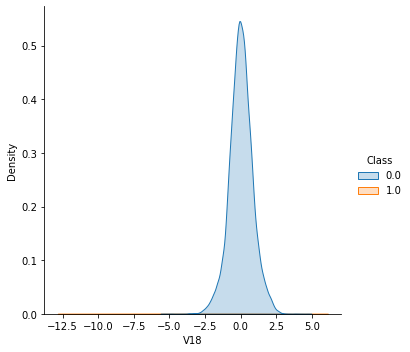

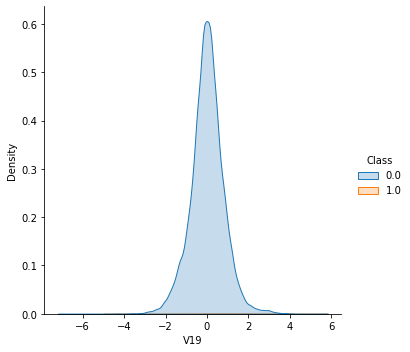

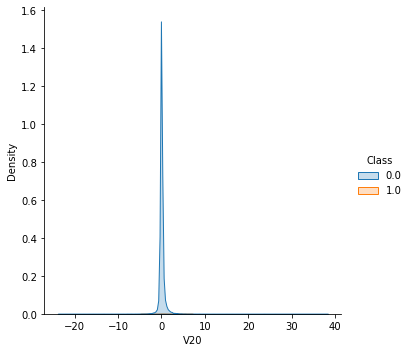

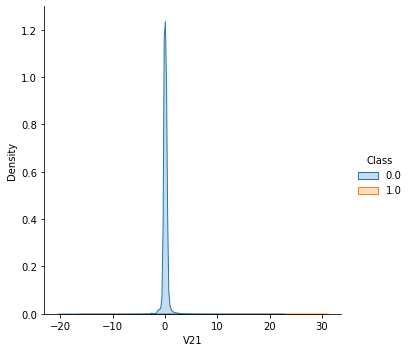

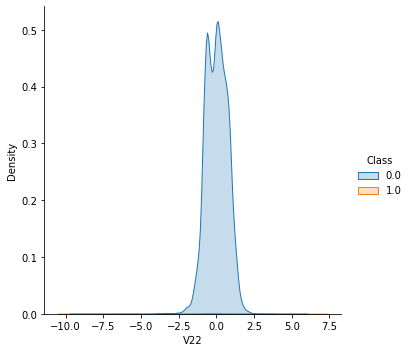

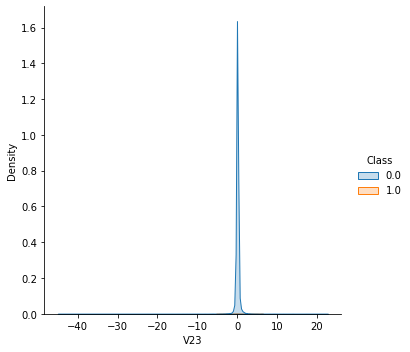

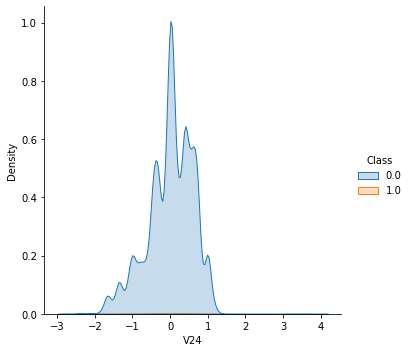

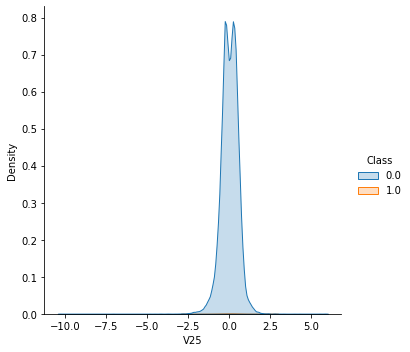

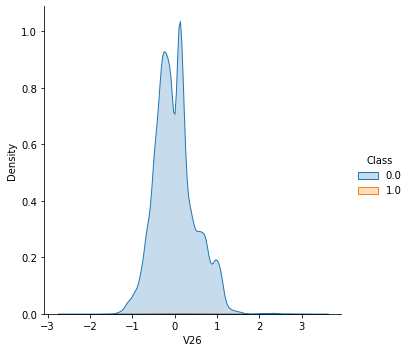

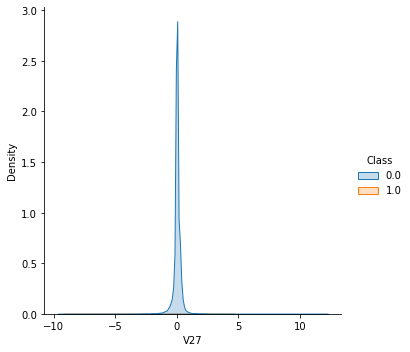

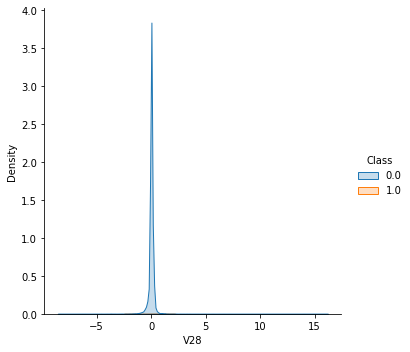

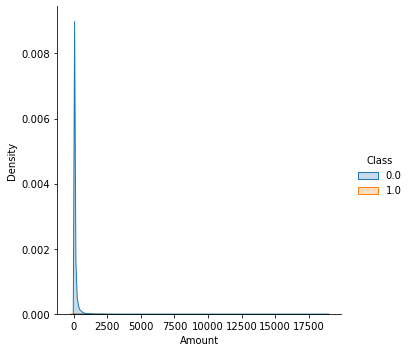

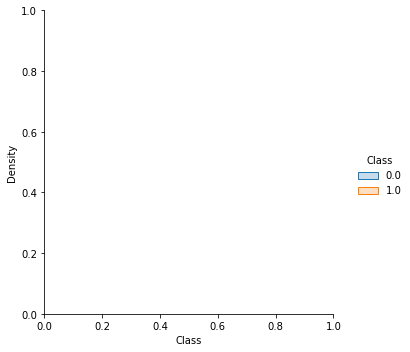

In [12]:
for feature in Test_set:
    sns.displot(Test_set, x=feature, kind="kde", fill=True, hue='Class')

C:\Users\asadn\anaconda3\lib\site-packages\seaborn\axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)
C:\Users\asadn\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


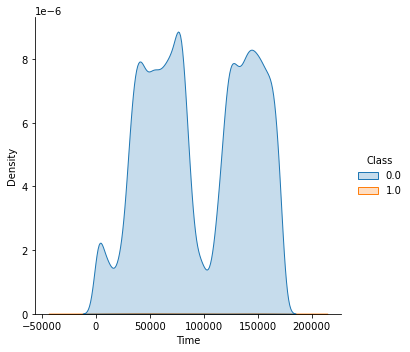

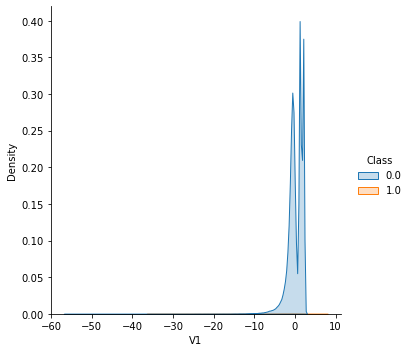

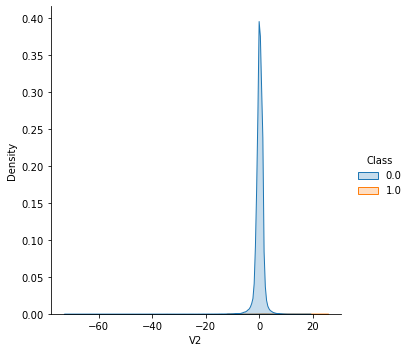

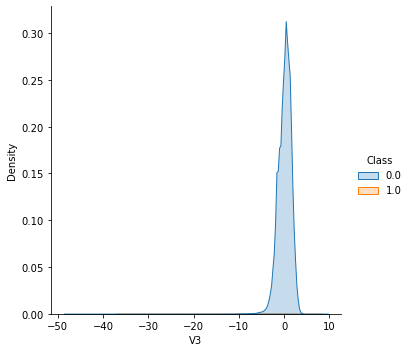

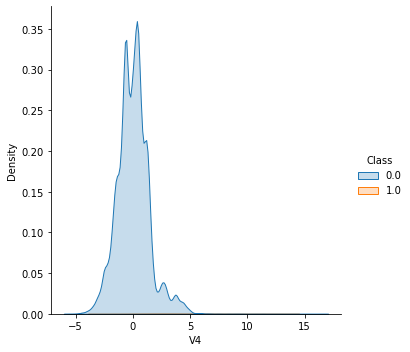

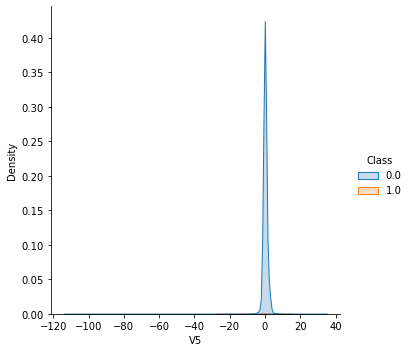

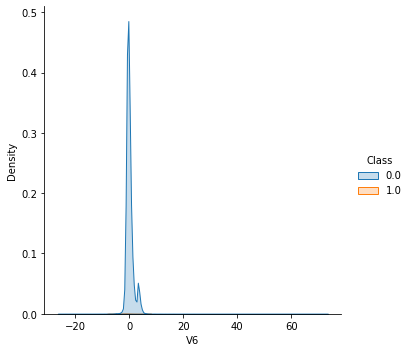

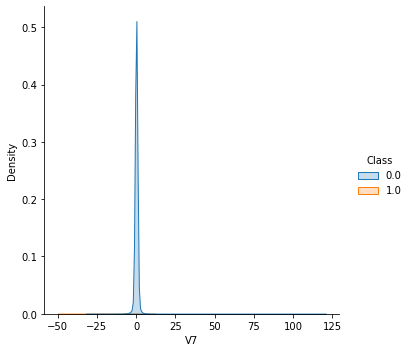

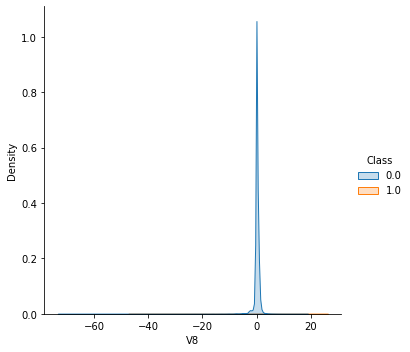

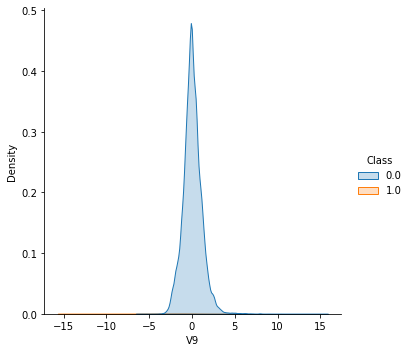

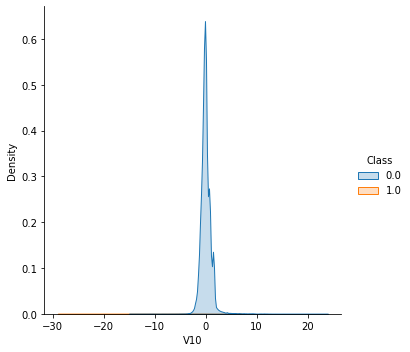

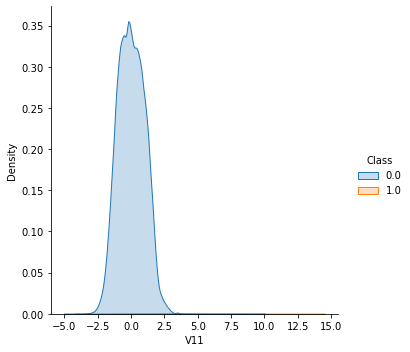

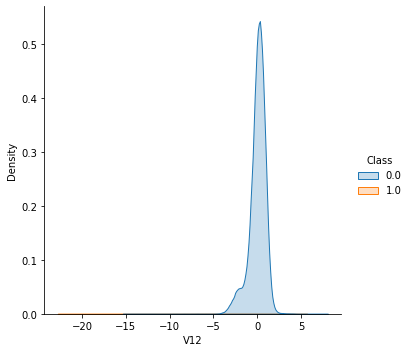

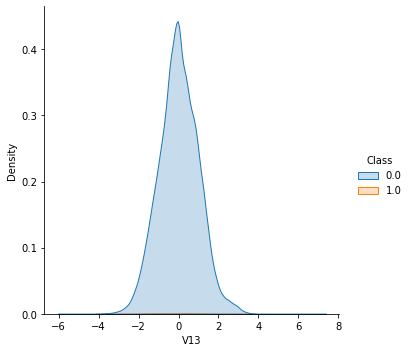

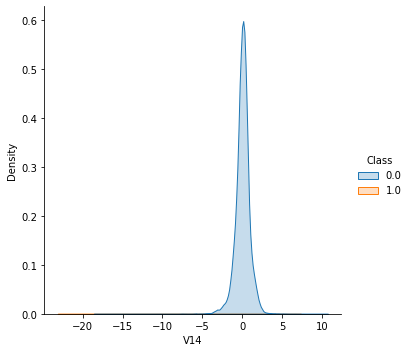

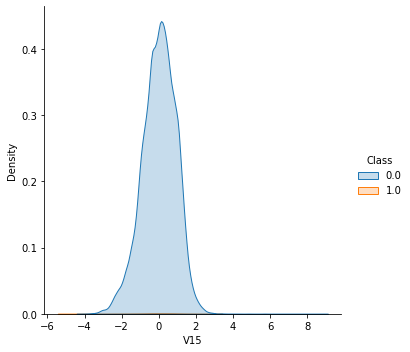

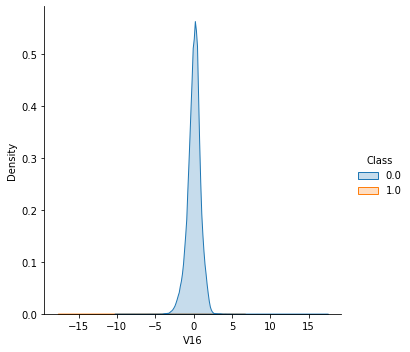

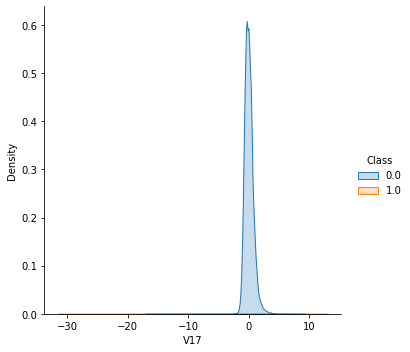

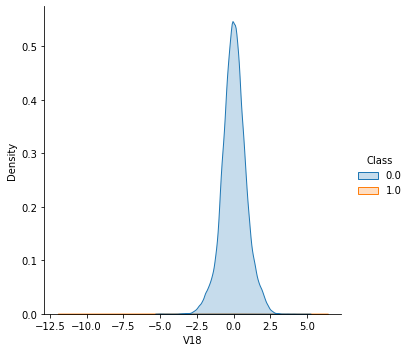

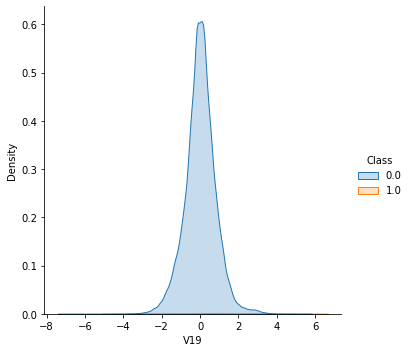

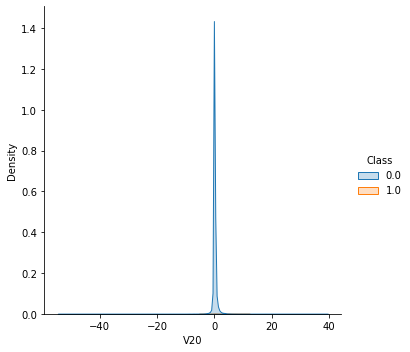

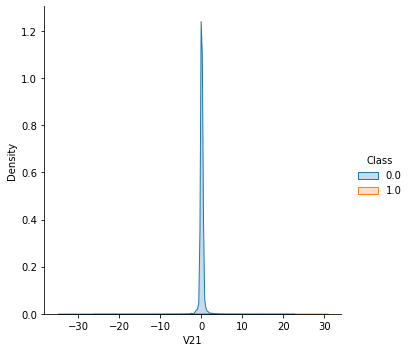

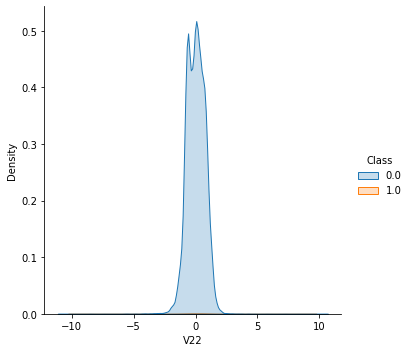

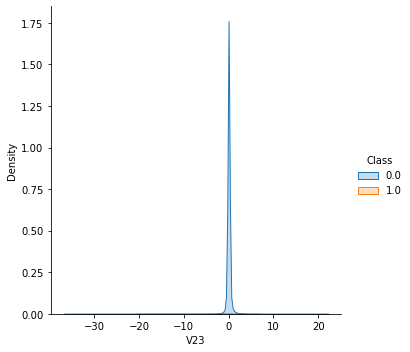

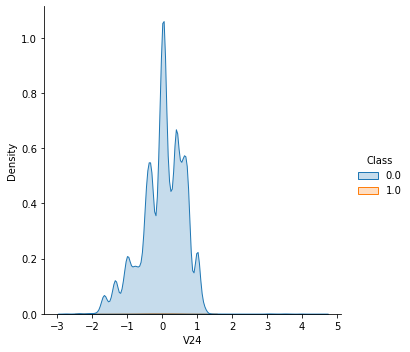

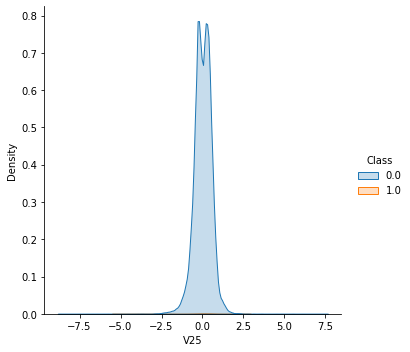

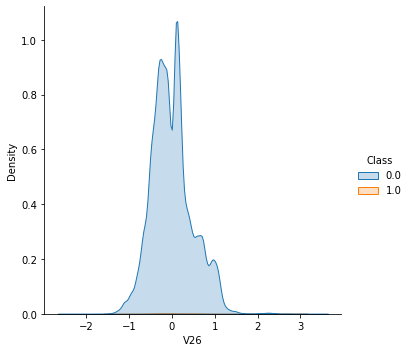

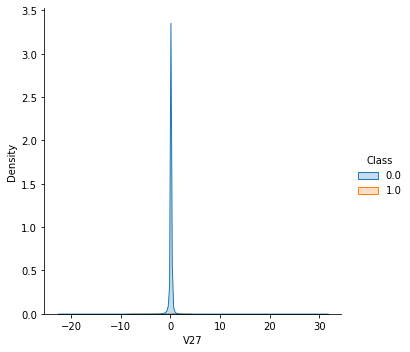

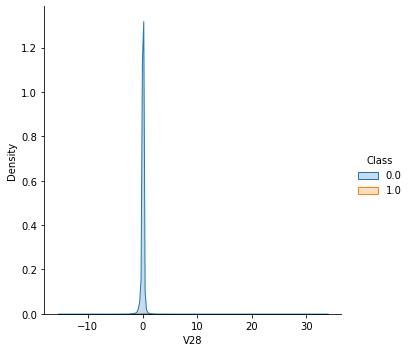

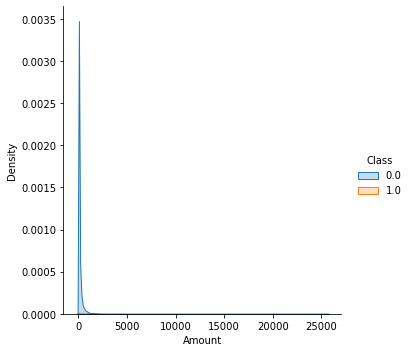

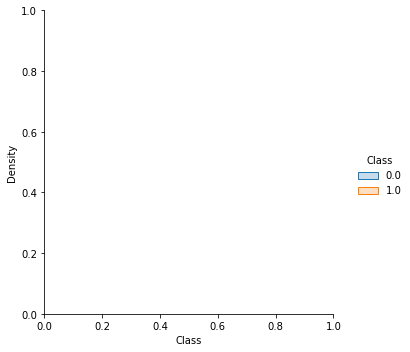

In [14]:
for feature in Training_set:
    sns.displot(Training_set, x=feature, kind="kde", fill=True, hue='Class')

In [ ]:
sns.swarmplot(data=Test_set, x='V1', y='Class')

### Here we plot a distribution plot of each feature against the class feature, the points that lie in the interesection will confuse the model in training

In [ ]:
for feature in df:
    sns.displot(df, x=feature, kind="kde", fill=True, hue='Class')

# Model build without sampling techniques applied and feature selection

#### As the dataset has been PCA transformed, we assume that the data has been pre scaled. However, the features 'TIme' and 'Amount' have not been scaled. We will scale them now.  

#### We will use robust scalar as it is better for data that has alot of outliers

In [4]:
# scale column amount and drop column time
from sklearn.preprocessing import RobustScaler

rob_scaler = RobustScaler()

Training_set['scaled_amount'] = rob_scaler.fit_transform(Training_set['Amount'].values.reshape(-1, 1))
Training_set.drop(['Time', 'Amount'], axis=1, inplace=True)

# rearrange columns
Class = Training_set['Class']
Training_set = Training_set.drop(columns=['Class'])
Training_set.insert(loc=(len(Training_set.columns)),column='Class', value=Class)

Test_set['scaled_amount'] = rob_scaler.fit_transform(Test_set['Amount'].values.reshape(-1, 1))
Test_set.drop(['Time', 'Amount'], axis=1, inplace=True)

# rearrange columns
Class = Test_set['Class']
Test_set = Test_set.drop(columns=['Class'])
Test_set.insert(loc=(len(Test_set.columns)),column='Class', value=Class)


#### Now let's consider our train test split
#### We can use simple train test split with different percentages of split. Also, we can do stratified train test splits and use different techniques 

In [7]:
from sklearn.model_selection import train_test_split

#splitting data into input and output
Training_data = Training_set.values
X_train, y_train = Training_data[:, :-1], Training_data[:, -1]

Test_data = Test_set.values
X_test, y_test = Test_data[:, :-1], Test_data[:, -1]

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(213605, 29) (71202, 29) (213605,) (71202,)


### Now we import the relavant libraries for training our model

In [8]:
#Import classification models and metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier


## commented due to testing
# logreg=LogisticRegression(max_iter=17000)
# svm=SVC()                         
# knn=KNeighborsClassifier()
# etree=ExtraTreesClassifier(random_state=42)
# rforest=RandomForestClassifier(random_state=42)
# xgboost = XGBClassifier(random_state=42)

In [9]:
#Import performance metrics
from sklearn.metrics import  confusion_matrix,classification_report,matthews_corrcoef
from sklearn.metrics import ConfusionMatrixDisplay
# GridsearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [11]:
def compute_performance(model, model_name, X_train, y_train, X_test, y_test):
    start_time = timeit.default_timer()
    print('Model Name:', model_name)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('Confusion Matrix: ')
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=['non-fraudulent', 'fraudulent'], cmap=plt.cm.Blues).plot()
    plt.show()
    cr = classification_report(y_test, y_pred, target_names=['fraudulent','non-fraudulent'])
    print('Classification Report: ')
    print(cr)
    mcc = matthews_corrcoef(y_test, y_pred)
    print('Matthews Correlation Coefficient: ', mcc)    
    elapsed = timeit.default_timer() - start_time
    print('Execution Time for performance computation: %.2f minutes' % (elapsed / 60))


In [12]:
# Define the models and their hyperparameter search spaces
models = {
    'logreg': (LogisticRegression(), {'C': [0.1, 1, 10], 'max_iter': [15000]}),
    'knn': (KNeighborsClassifier(), {'n_neighbors': [3, 5, 7]}),
    'xgboost': (XGBClassifier(), {'max_depth': [3, 5, 7], 'learning_rate': [0.1, 0.01, 0.001]}),
    'rforest': (RandomForestClassifier(), {'n_estimators': [100, 200, 500], 'max_depth': [3, 5, 7]})
}

SVM = SVC(kernel='poly', degree=7)

#### This function helps us compute the perfromance of our model

Tuning logreg...
Best Parameters for logreg:  {'C': 1, 'max_iter': 15000}
Best Score for logreg:  0.687708767624201
Model Name: logreg
Confusion Matrix: 


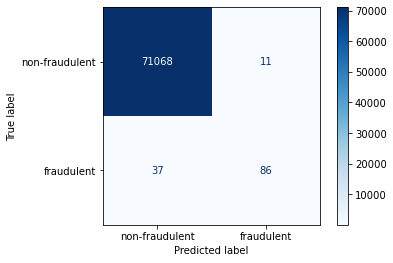

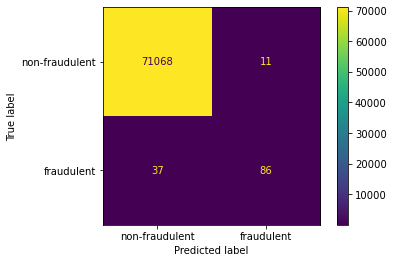

Classification Report: 
                precision    recall  f1-score   support

    fraudulent       1.00      1.00      1.00     71079
non-fraudulent       0.89      0.70      0.78       123

      accuracy                           1.00     71202
     macro avg       0.94      0.85      0.89     71202
  weighted avg       1.00      1.00      1.00     71202

Matthews Correlation Coefficient:  0.7870176562974204
Execution Time for performance computation: 0.04 minutes
---------------------------------
Tuning knn...
Best Parameters for knn:  {'n_neighbors': 3}
Best Score for knn:  0.845254944950093
Model Name: knn
Confusion Matrix: 


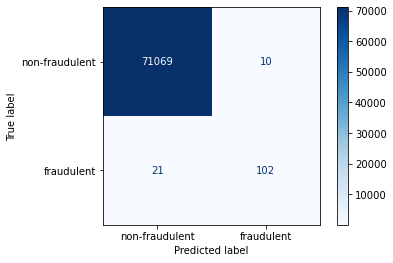

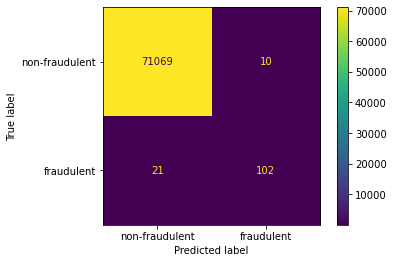

Classification Report: 
                precision    recall  f1-score   support

    fraudulent       1.00      1.00      1.00     71079
non-fraudulent       0.91      0.83      0.87       123

      accuracy                           1.00     71202
     macro avg       0.96      0.91      0.93     71202
  weighted avg       1.00      1.00      1.00     71202

Matthews Correlation Coefficient:  0.8688230138094213
Execution Time for performance computation: 0.61 minutes
---------------------------------
Tuning xgboost...
Best Parameters for xgboost:  {'learning_rate': 0.1, 'max_depth': 7}
Best Score for xgboost:  0.8529958033346794
Model Name: xgboost
Confusion Matrix: 


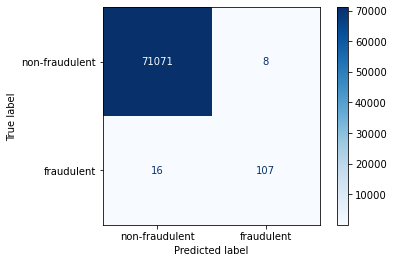

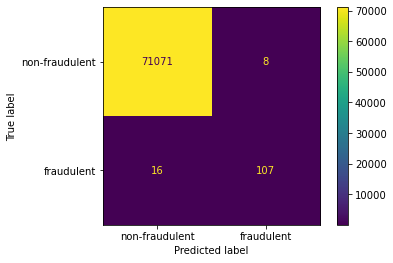

Classification Report: 
                precision    recall  f1-score   support

    fraudulent       1.00      1.00      1.00     71079
non-fraudulent       0.93      0.87      0.90       123

      accuracy                           1.00     71202
     macro avg       0.97      0.93      0.95     71202
  weighted avg       1.00      1.00      1.00     71202

Matthews Correlation Coefficient:  0.8995010404671542
Execution Time for performance computation: 1.05 minutes
---------------------------------
Tuning rforest...
Best Parameters for rforest:  {'max_depth': 7, 'n_estimators': 100}
Best Score for rforest:  0.8234915325052011
Model Name: rforest
Confusion Matrix: 


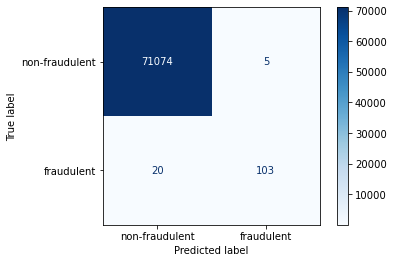

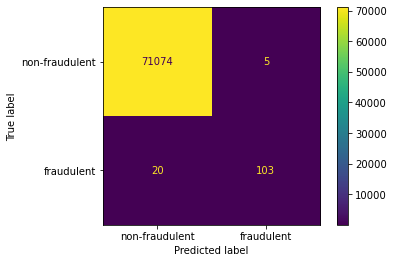

Classification Report: 
                precision    recall  f1-score   support

    fraudulent       1.00      1.00      1.00     71079
non-fraudulent       0.95      0.84      0.89       123

      accuracy                           1.00     71202
     macro avg       0.98      0.92      0.95     71202
  weighted avg       1.00      1.00      1.00     71202

Matthews Correlation Coefficient:  0.8934916272517731
Execution Time for performance computation: 3.51 minutes
---------------------------------


In [17]:
# Loop through each model and tune its hyperparameters using GridSearchCV
for model_name, (model, param_grid) in models.items():
    print(f'Tuning {model_name}...')
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='f1')
    grid_search.fit(X_train, y_train)
    print(f'Best Parameters for {model_name}: ', grid_search.best_params_)
    print(f'Best Score for {model_name}: ', grid_search.best_score_)
    best_model = grid_search.best_estimator_
    compute_performance(best_model, model_name, X_train, y_train, X_test, y_test)
    print('---------------------------------')

Model Name: SVM
Confusion Matrix: 


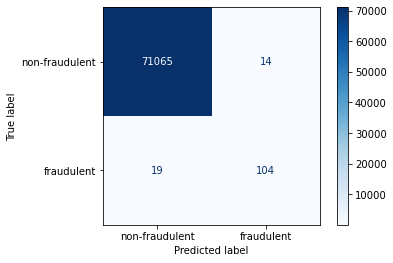

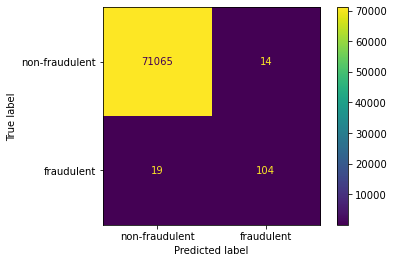

Classification Report: 
                precision    recall  f1-score   support

    fraudulent       1.00      1.00      1.00     71079
non-fraudulent       0.88      0.85      0.86       123

      accuracy                           1.00     71202
     macro avg       0.94      0.92      0.93     71202
  weighted avg       1.00      1.00      1.00     71202

Matthews Correlation Coefficient:  0.8630248990747232
Execution Time for performance computation: 7.90 minutes
---------------------------------


In [33]:
#SVM separate due to computational time
compute_performance(SVM, 'SVM', X_train, y_train, X_test, y_test)
print('---------------------------------')

#### For each algorithm mentioned, compute the performance

# Feature selection

#### Feature selection based on entropy based methods

In [18]:
from sklearn.feature_selection import mutual_info_classif

# select k best features based on mutual information
k = 10
mi_scores = mutual_info_classif(X_train, y_train, random_state=42)
k_best_features_mi = X_train[:, mi_scores.argsort()[-k:]]

# get the indices of the k best features
selected_idx = mi_scores.argsort()[-k:]

# get the names of the k best features
selected_features = [df.columns[i] for i in selected_idx]

# select the k best features
k_best_features_mi_train = X_train[:, selected_idx]
k_best_features_mi_test = X_test[:, selected_idx]

# print the names and scores of the k best features
print('K best features based on mutual information:')
for feature, score in zip(selected_features, mi_scores[selected_idx]):
    print(f'{feature}: {score}')


K best features based on mutual information:
V6: 0.003817571580784773
V17: 0.0038872968631286087
V2: 0.004584602697475737
V3: 0.0046695454310466955
V15: 0.005723276269409827
V10: 0.006465500606811392
V9: 0.007208003957298148
V11: 0.007215011194368182
V13: 0.00782749797130422
V16: 0.007933834027864628


In [20]:
from sklearn.feature_selection import mutual_info_classif

# select k best features based on information gain
k = 10
ig_scores = mutual_info_classif(X_train, y_train, random_state=42)
ig_scores /= np.max(ig_scores)  # normalize scores to [0, 1]
ig_scores *= np.log2(X_train.shape[1])  # scale scores by log2(n_features)

# get the indices of the k best features
selected_idx = ig_scores.argsort()[-k:]

# get the names of the k best features
selected_features = [df.columns[i] for i in selected_idx]

# select the k best features
k_best_features_ig = X_train[:, selected_idx]
k_best_features_ig_test = X_test[:, selected_idx]


# print the names and scores of the k best features
print('K best features based on information gain:')
for feature, score in zip(selected_features, ig_scores[selected_idx]):
    print(f'{feature}: {score}')

K best features based on information gain:
V6: 2.337544511500586
V17: 2.380238131674214
V2: 2.8072067926208133
V3: 2.859218239282367
V15: 3.504430171970818
V10: 3.958902966908832
V9: 4.413546604879419
V11: 4.417837219529917
V13: 4.79287016219951
V16: 4.857980995127572


In [21]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

# select k best features based on gini index
k = 10
selector = SelectKBest(mutual_info_classif, k=k).fit(X_train, y_train)
k_best_features_gini = selector.transform(X_train)
k_best_features_gini_test = selector.transform(X_test)

# get the indices of the selected features
selected_idx = selector.get_support(indices=True)

# get the names of the selected features
selected_features = [df.columns[i] for i in selected_idx]

# print the names and scores of the selected features
print('K best features based on gini index:')
for feature, score in zip(selected_features, selector.scores_[selected_idx]):
    print(f'{feature}: {score}')


K best features based on gini index:
V2: 0.004584602697475737
V3: 0.0046695454310466955
V6: 0.003817571580784773
V9: 0.007208003957298148
V10: 0.006465500606811392
V11: 0.007215011194368182
V13: 0.00782749797130422
V15: 0.005723276269409827
V16: 0.007933834027864628
V17: 0.0038872968631286087


Tuning logreg...
Best Parameters for logreg:  {'C': 10, 'max_iter': 15000}
Best Score for logreg:  0.6825161067051391
Model Name: logreg
Confusion Matrix: 


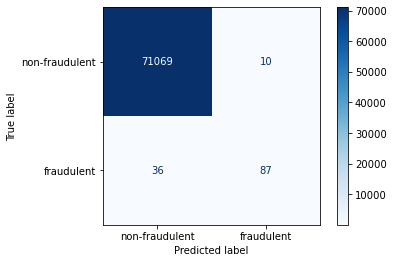

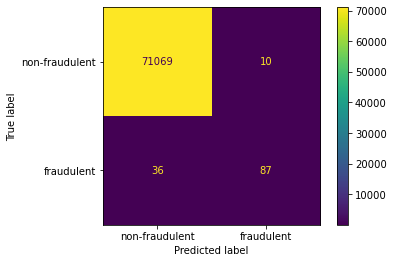

Classification Report: 
                precision    recall  f1-score   support

    fraudulent       1.00      1.00      1.00     71079
non-fraudulent       0.90      0.71      0.79       123

      accuracy                           1.00     71202
     macro avg       0.95      0.85      0.90     71202
  weighted avg       1.00      1.00      1.00     71202

Matthews Correlation Coefficient:  0.7961868900613869
Execution Time for performance computation: 0.04 minutes
---------------------------------
Tuning knn...
Best Parameters for knn:  {'n_neighbors': 3}
Best Score for knn:  0.8550259562282247
Model Name: knn
Confusion Matrix: 


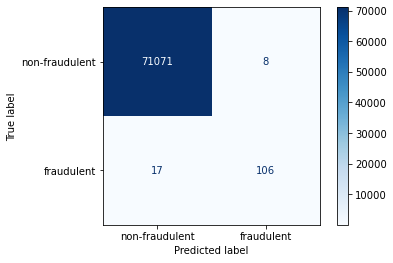

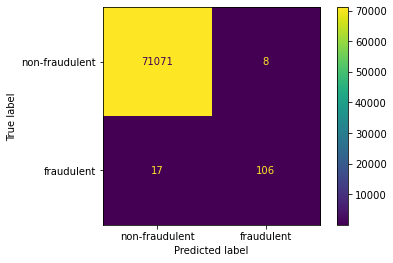

Classification Report: 
                precision    recall  f1-score   support

    fraudulent       1.00      1.00      1.00     71079
non-fraudulent       0.93      0.86      0.89       123

      accuracy                           1.00     71202
     macro avg       0.96      0.93      0.95     71202
  weighted avg       1.00      1.00      1.00     71202

Matthews Correlation Coefficient:  0.8949868768442932
Execution Time for performance computation: 0.62 minutes
---------------------------------
Tuning xgboost...
Best Parameters for xgboost:  {'learning_rate': 0.1, 'max_depth': 7}
Best Score for xgboost:  0.8263118368148472
Model Name: xgboost
Confusion Matrix: 


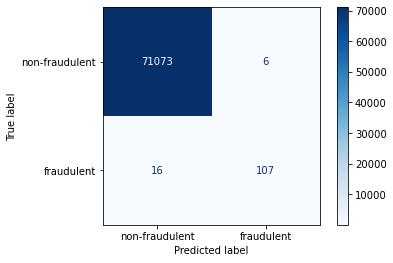

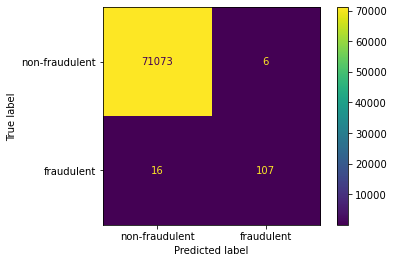

Classification Report: 
                precision    recall  f1-score   support

    fraudulent       1.00      1.00      1.00     71079
non-fraudulent       0.95      0.87      0.91       123

      accuracy                           1.00     71202
     macro avg       0.97      0.93      0.95     71202
  weighted avg       1.00      1.00      1.00     71202

Matthews Correlation Coefficient:  0.9074429024383674
Execution Time for performance computation: 0.73 minutes
---------------------------------
Tuning rforest...
Best Parameters for rforest:  {'max_depth': 7, 'n_estimators': 100}
Best Score for rforest:  0.834884765186494
Model Name: rforest
Confusion Matrix: 


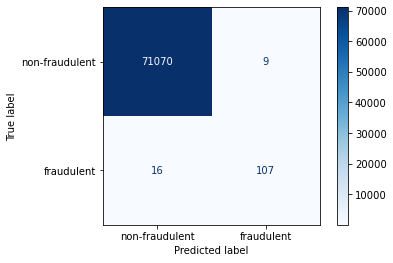

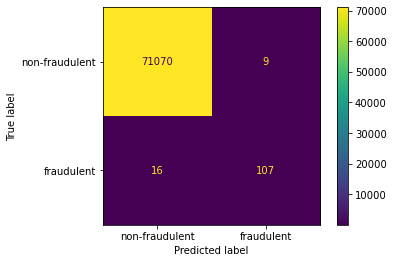

Classification Report: 
                precision    recall  f1-score   support

    fraudulent       1.00      1.00      1.00     71079
non-fraudulent       0.92      0.87      0.90       123

      accuracy                           1.00     71202
     macro avg       0.96      0.93      0.95     71202
  weighted avg       1.00      1.00      1.00     71202

Matthews Correlation Coefficient:  0.8956073017357695
Execution Time for performance computation: 2.22 minutes
---------------------------------


In [22]:
# Loop through each model and tune its hyperparameters using GridSearchCV
for model_name, (model, param_grid) in models.items():
    print(f'Tuning {model_name}...')
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='f1')
    grid_search.fit(k_best_features_mi_train, y_train)
    print(f'Best Parameters for {model_name}: ', grid_search.best_params_)
    print(f'Best Score for {model_name}: ', grid_search.best_score_)
    best_model = grid_search.best_estimator_
    compute_performance(best_model, model_name, k_best_features_mi_train, y_train, k_best_features_mi_test, y_test)
    print('---------------------------------')

Model Name: SVM
Confusion Matrix: 


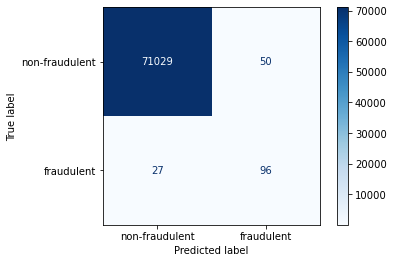

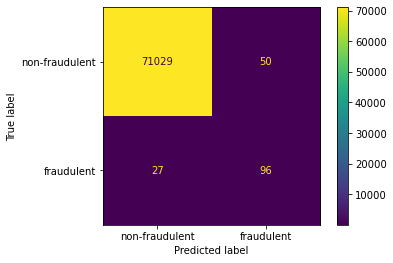

Classification Report: 
                precision    recall  f1-score   support

    fraudulent       1.00      1.00      1.00     71079
non-fraudulent       0.66      0.78      0.71       123

      accuracy                           1.00     71202
     macro avg       0.83      0.89      0.86     71202
  weighted avg       1.00      1.00      1.00     71202

Matthews Correlation Coefficient:  0.7158481815995035
Execution Time for performance computation: 53.03 minutes
---------------------------------


In [32]:
#SVM separate due to computational time
compute_performance(SVM, 'SVM',  k_best_features_mi_train, y_train, k_best_features_mi_test, y_test)
print('---------------------------------')

# **SMOTE Implementation**

In [28]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training data
smote = SMOTE(sampling_strategy='minority',random_state=0)
X_train_SM, y_train_SM = smote.fit_resample(X_train, y_train)


Tuning logreg...
Best Parameters for logreg:  {'C': 10, 'max_iter': 15000}
Best Score for logreg:  0.946158591561351
Model Name: logreg
Confusion Matrix: 


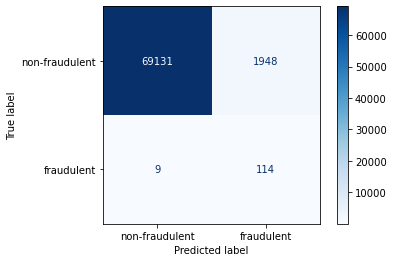

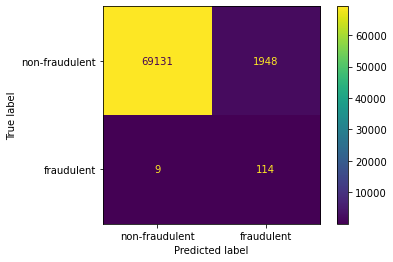

Classification Report: 
                precision    recall  f1-score   support

    fraudulent       1.00      0.97      0.99     71079
non-fraudulent       0.06      0.93      0.10       123

      accuracy                           0.97     71202
     macro avg       0.53      0.95      0.55     71202
  weighted avg       1.00      0.97      0.98     71202

Matthews Correlation Coefficient:  0.22272976059664515
Execution Time for performance computation: 0.15 minutes
---------------------------------
Tuning knn...
Best Parameters for knn:  {'n_neighbors': 3}
Best Score for knn:  0.9991636186798509
Model Name: knn
Confusion Matrix: 


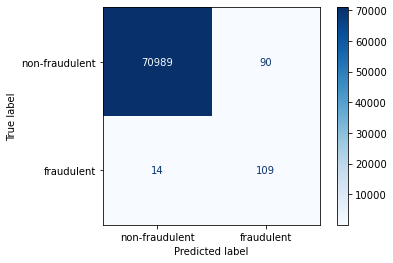

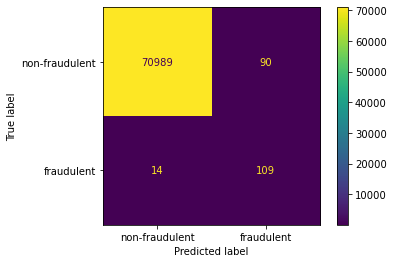

Classification Report: 
                precision    recall  f1-score   support

    fraudulent       1.00      1.00      1.00     71079
non-fraudulent       0.55      0.89      0.68       123

      accuracy                           1.00     71202
     macro avg       0.77      0.94      0.84     71202
  weighted avg       1.00      1.00      1.00     71202

Matthews Correlation Coefficient:  0.6960793234415732
Execution Time for performance computation: 1.48 minutes
---------------------------------
Tuning xgboost...
Best Parameters for xgboost:  {'learning_rate': 0.1, 'max_depth': 7}
Best Score for xgboost:  0.9990673958400921
Model Name: xgboost
Confusion Matrix: 


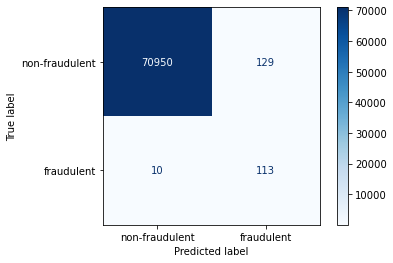

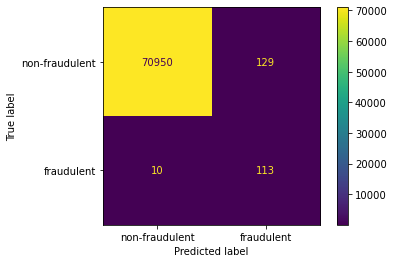

Classification Report: 
                precision    recall  f1-score   support

    fraudulent       1.00      1.00      1.00     71079
non-fraudulent       0.47      0.92      0.62       123

      accuracy                           1.00     71202
     macro avg       0.73      0.96      0.81     71202
  weighted avg       1.00      1.00      1.00     71202

Matthews Correlation Coefficient:  0.6542191651828911
Execution Time for performance computation: 3.63 minutes
---------------------------------
Tuning rforest...
Best Parameters for rforest:  {'max_depth': 7, 'n_estimators': 500}
Best Score for rforest:  0.9683927408704692
Model Name: rforest
Confusion Matrix: 


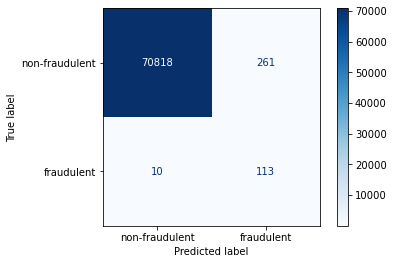

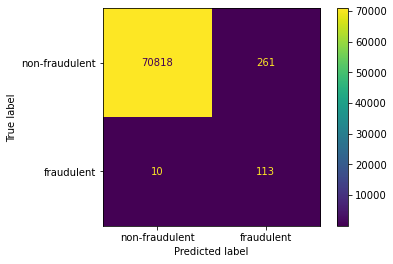

Classification Report: 
                precision    recall  f1-score   support

    fraudulent       1.00      1.00      1.00     71079
non-fraudulent       0.30      0.92      0.45       123

      accuracy                           1.00     71202
     macro avg       0.65      0.96      0.73     71202
  weighted avg       1.00      1.00      1.00     71202

Matthews Correlation Coefficient:  0.5256769467442028
Execution Time for performance computation: 12.03 minutes
---------------------------------


In [29]:
# Loop through each model and tune its hyperparameters using GridSearchCV
for model_name, (model, param_grid) in models.items():
    print(f'Tuning {model_name}...')
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='f1')
    grid_search.fit(X_train_SM, y_train_SM)
    print(f'Best Parameters for {model_name}: ', grid_search.best_params_)
    print(f'Best Score for {model_name}: ', grid_search.best_score_)
    best_model = grid_search.best_estimator_
    compute_performance(best_model, model_name, X_train_SM, y_train_SM, X_test, y_test)
    print('---------------------------------')

Model Name: SVM
Confusion Matrix: 


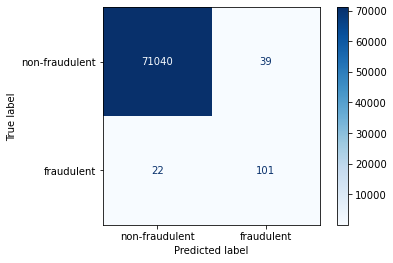

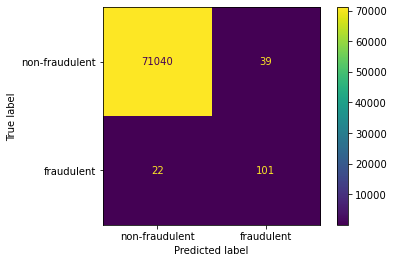

Classification Report: 
                precision    recall  f1-score   support

    fraudulent       1.00      1.00      1.00     71079
non-fraudulent       0.72      0.82      0.77       123

      accuracy                           1.00     71202
     macro avg       0.86      0.91      0.88     71202
  weighted avg       1.00      1.00      1.00     71202

Matthews Correlation Coefficient:  0.7692481291629627
Execution Time for performance computation: 319.45 minutes
---------------------------------


In [35]:
#SVM separate due to computational time
compute_performance(SVM, 'SVM',  X_train_SM, y_train_SM, X_test, y_test)
print('---------------------------------')

In [25]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the entropy based feature selected training data
smote = SMOTE(sampling_strategy='minority',random_state=0)
X_train_SM_FS, y_train_SM_FS = smote.fit_resample(k_best_features_mi_train, y_train)

Tuning logreg...
Best Parameters for logreg:  {'C': 10, 'max_iter': 15000}
Best Score for logreg:  0.9336497606197531
Model Name: logreg
Confusion Matrix: 


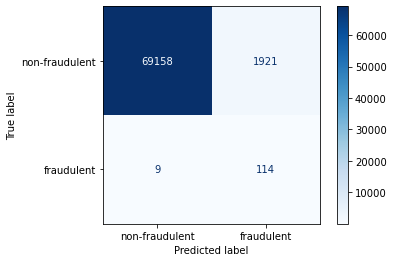

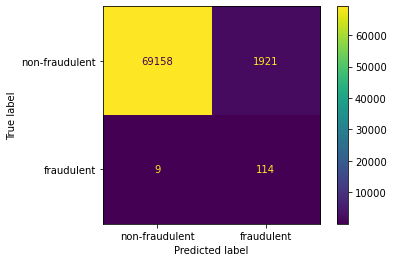

Classification Report: 
                precision    recall  f1-score   support

    fraudulent       1.00      0.97      0.99     71079
non-fraudulent       0.06      0.93      0.11       123

      accuracy                           0.97     71202
     macro avg       0.53      0.95      0.55     71202
  weighted avg       1.00      0.97      0.98     71202

Matthews Correlation Coefficient:  0.22425336654594177
Execution Time for performance computation: 0.04 minutes
---------------------------------
Tuning knn...
Best Parameters for knn:  {'n_neighbors': 3}
Best Score for knn:  0.9987167075162535
Model Name: knn
Confusion Matrix: 


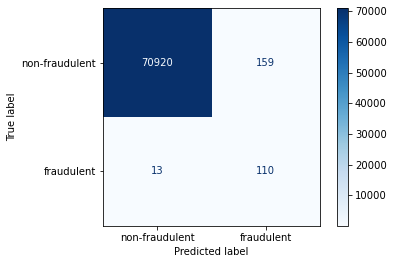

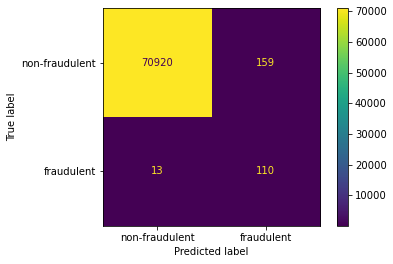

Classification Report: 
                precision    recall  f1-score   support

    fraudulent       1.00      1.00      1.00     71079
non-fraudulent       0.41      0.89      0.56       123

      accuracy                           1.00     71202
     macro avg       0.70      0.95      0.78     71202
  weighted avg       1.00      1.00      1.00     71202

Matthews Correlation Coefficient:  0.6038412982163177
Execution Time for performance computation: 0.63 minutes
---------------------------------
Tuning xgboost...
Best Parameters for xgboost:  {'learning_rate': 0.1, 'max_depth': 7}
Best Score for xgboost:  0.9956271895242436
Model Name: xgboost
Confusion Matrix: 


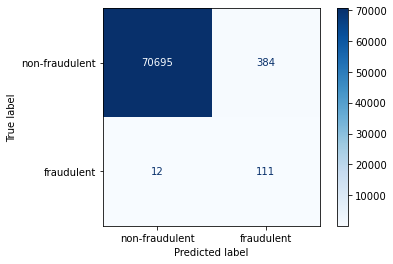

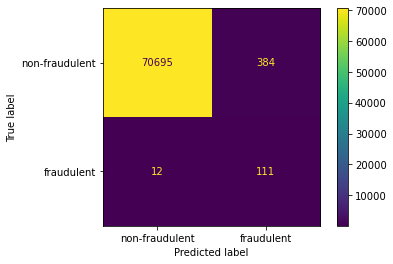

Classification Report: 
                precision    recall  f1-score   support

    fraudulent       1.00      0.99      1.00     71079
non-fraudulent       0.22      0.90      0.36       123

      accuracy                           0.99     71202
     macro avg       0.61      0.95      0.68     71202
  weighted avg       1.00      0.99      1.00     71202

Matthews Correlation Coefficient:  0.448331817235479
Execution Time for performance computation: 1.60 minutes
---------------------------------
Tuning rforest...
Best Parameters for rforest:  {'max_depth': 7, 'n_estimators': 500}
Best Score for rforest:  0.965399785822086
Model Name: rforest
Confusion Matrix: 


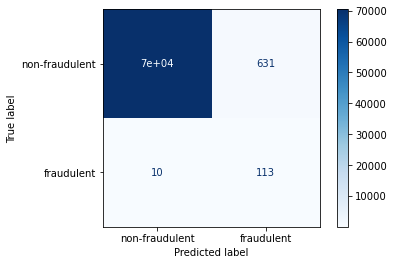

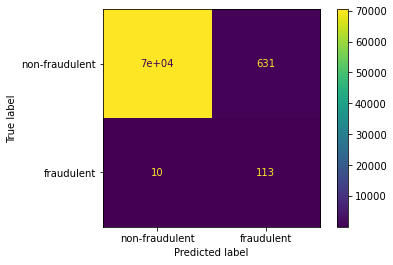

Classification Report: 
                precision    recall  f1-score   support

    fraudulent       1.00      0.99      1.00     71079
non-fraudulent       0.15      0.92      0.26       123

      accuracy                           0.99     71202
     macro avg       0.58      0.95      0.63     71202
  weighted avg       1.00      0.99      0.99     71202

Matthews Correlation Coefficient:  0.3715590957241906
Execution Time for performance computation: 21.77 minutes
---------------------------------


In [26]:
# Loop through each model and tune its hyperparameters using GridSearchCV
for model_name, (model, param_grid) in models.items():
    print(f'Tuning {model_name}...')
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='f1')
    grid_search.fit(X_train_SM_FS, y_train_SM_FS)
    print(f'Best Parameters for {model_name}: ', grid_search.best_params_)
    print(f'Best Score for {model_name}: ', grid_search.best_score_)
    best_model = grid_search.best_estimator_
    compute_performance(best_model, model_name, X_train_SM_FS, y_train_SM_FS, k_best_features_mi_test, y_test)
    print('---------------------------------')

Model Name: SVM
Confusion Matrix: 


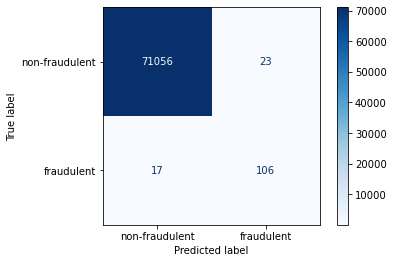

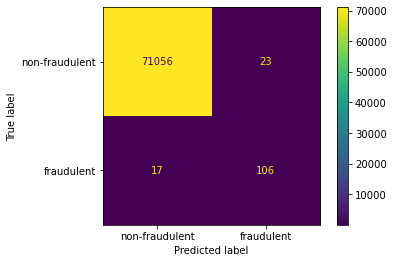

Classification Report: 
                precision    recall  f1-score   support

    fraudulent       1.00      1.00      1.00     71079
non-fraudulent       0.82      0.86      0.84       123

      accuracy                           1.00     71202
     macro avg       0.91      0.93      0.92     71202
  weighted avg       1.00      1.00      1.00     71202

Matthews Correlation Coefficient:  0.8412279351385075
Execution Time for performance computation: 108.28 minutes
---------------------------------


In [34]:
#SVM separate due to computational time
compute_performance(SVM, 'SVM',  X_train_SM_FS, y_train_SM_FS, k_best_features_mi_test, y_test)
print('---------------------------------')

# **UNDERSAMPLING IMPLEMENTATION**



In [13]:
from imblearn.under_sampling import RandomUnderSampler

# Apply random under-sampling to the training data
undersample = RandomUnderSampler(sampling_strategy='majority',random_state=0)
X_train_RU, y_train_RU = undersample.fit_resample(X_train, y_train)


Tuning logreg...
Best Parameters for logreg:  {'C': 10, 'max_iter': 15000}
Best Score for logreg:  0.9307942735611487
Model Name: logreg
Confusion Matrix: 


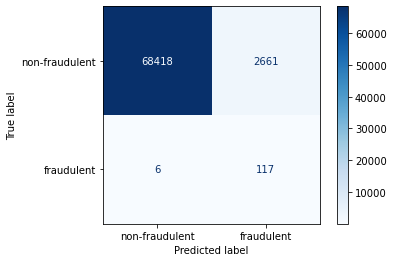

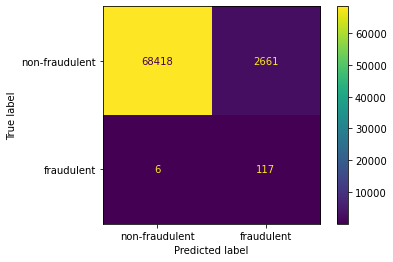

Classification Report: 
                precision    recall  f1-score   support

    fraudulent       1.00      0.96      0.98     71079
non-fraudulent       0.04      0.95      0.08       123

      accuracy                           0.96     71202
     macro avg       0.52      0.96      0.53     71202
  weighted avg       1.00      0.96      0.98     71202

Matthews Correlation Coefficient:  0.19597271029746088
Execution Time for performance computation: 0.01 minutes
---------------------------------
Tuning knn...
Best Parameters for knn:  {'n_neighbors': 5}
Best Score for knn:  0.9269321983797727
Model Name: knn
Confusion Matrix: 


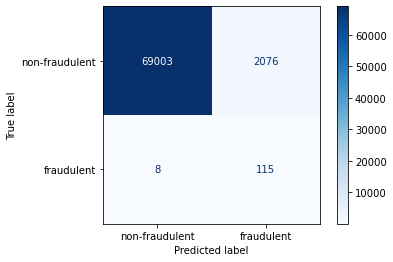

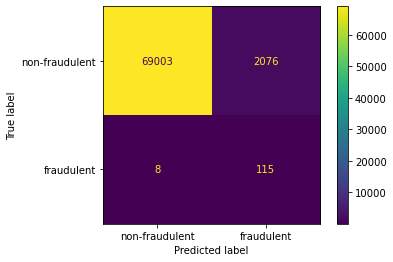

Classification Report: 
                precision    recall  f1-score   support

    fraudulent       1.00      0.97      0.99     71079
non-fraudulent       0.05      0.93      0.10       123

      accuracy                           0.97     71202
     macro avg       0.53      0.95      0.54     71202
  weighted avg       1.00      0.97      0.98     71202

Matthews Correlation Coefficient:  0.21779723396571934
Execution Time for performance computation: 0.03 minutes
---------------------------------
Tuning xgboost...
Best Parameters for xgboost:  {'learning_rate': 0.1, 'max_depth': 3}
Best Score for xgboost:  0.9349361196307114
Model Name: xgboost
Confusion Matrix: 


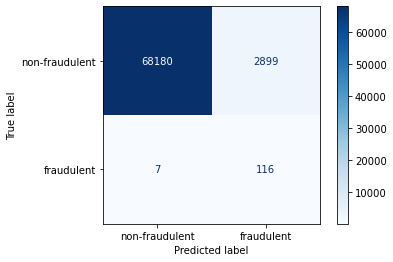

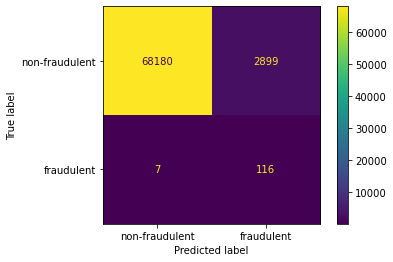

Classification Report: 
                precision    recall  f1-score   support

    fraudulent       1.00      0.96      0.98     71079
non-fraudulent       0.04      0.94      0.07       123

      accuracy                           0.96     71202
     macro avg       0.52      0.95      0.53     71202
  weighted avg       1.00      0.96      0.98     71202

Matthews Correlation Coefficient:  0.1860722286438516
Execution Time for performance computation: 0.01 minutes
---------------------------------
Tuning rforest...
Best Parameters for rforest:  {'max_depth': 7, 'n_estimators': 200}
Best Score for rforest:  0.9294689745248009
Model Name: rforest
Confusion Matrix: 


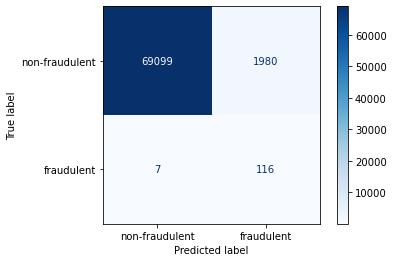

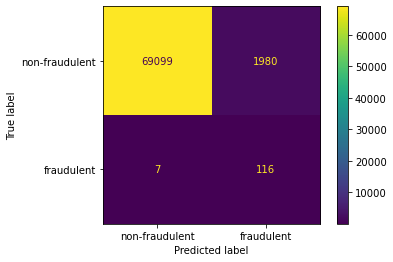

Classification Report: 
                precision    recall  f1-score   support

    fraudulent       1.00      0.97      0.99     71079
non-fraudulent       0.06      0.94      0.10       123

      accuracy                           0.97     71202
     macro avg       0.53      0.96      0.55     71202
  weighted avg       1.00      0.97      0.98     71202

Matthews Correlation Coefficient:  0.22485441144527774
Execution Time for performance computation: 0.03 minutes
---------------------------------


In [14]:
# Loop through each model and tune its hyperparameters using GridSearchCV
for model_name, (model, param_grid) in models.items():
    print(f'Tuning {model_name}...')
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='f1')
    grid_search.fit(X_train_RU, y_train_RU)
    print(f'Best Parameters for {model_name}: ', grid_search.best_params_)
    print(f'Best Score for {model_name}: ', grid_search.best_score_)
    best_model = grid_search.best_estimator_
    compute_performance(best_model, model_name, X_train_RU, y_train_RU, X_test, y_test)
    print('---------------------------------')

Model Name: SVM
Confusion Matrix: 


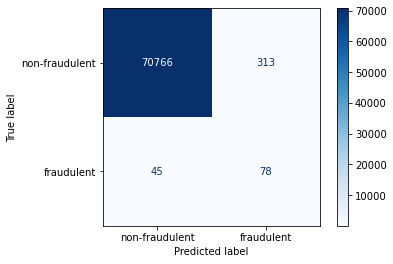

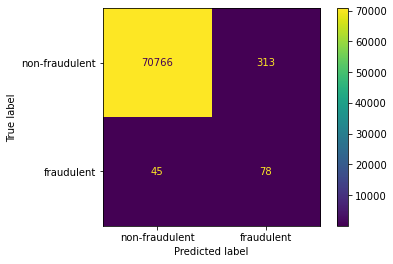

Classification Report: 
                precision    recall  f1-score   support

    fraudulent       1.00      1.00      1.00     71079
non-fraudulent       0.20      0.63      0.30       123

      accuracy                           0.99     71202
     macro avg       0.60      0.81      0.65     71202
  weighted avg       1.00      0.99      1.00     71202

Matthews Correlation Coefficient:  0.35387319897393343
Execution Time for performance computation: 0.03 minutes
---------------------------------


In [31]:
#SVM separate due to computational time
compute_performance(SVM, 'SVM',  X_train_RU, y_train_RU, X_test, y_test)
print('---------------------------------')

In [23]:
from imblearn.under_sampling import RandomUnderSampler

# Apply random under-sampling to the training data
undersample = RandomUnderSampler(sampling_strategy='majority',random_state=0)
X_train_RU_FS, y_train_RU_FS = undersample.fit_resample(k_best_features_mi_train, y_train)


Tuning logreg...
Best Parameters for logreg:  {'C': 1, 'max_iter': 15000}
Best Score for logreg:  0.9252315747266231
Model Name: logreg
Confusion Matrix: 


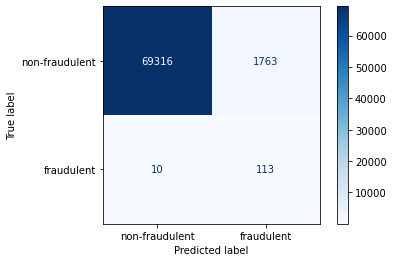

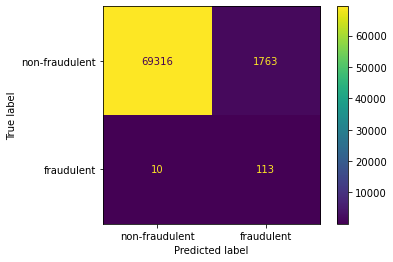

Classification Report: 
                precision    recall  f1-score   support

    fraudulent       1.00      0.98      0.99     71079
non-fraudulent       0.06      0.92      0.11       123

      accuracy                           0.98     71202
     macro avg       0.53      0.95      0.55     71202
  weighted avg       1.00      0.98      0.99     71202

Matthews Correlation Coefficient:  0.23176380814779718
Execution Time for performance computation: 0.02 minutes
---------------------------------
Tuning knn...
Best Parameters for knn:  {'n_neighbors': 5}
Best Score for knn:  0.9333877283252601
Model Name: knn
Confusion Matrix: 


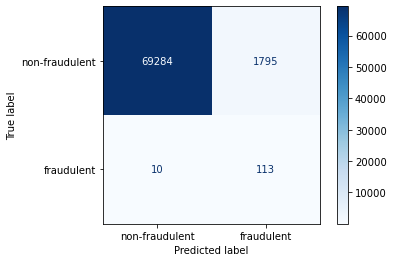

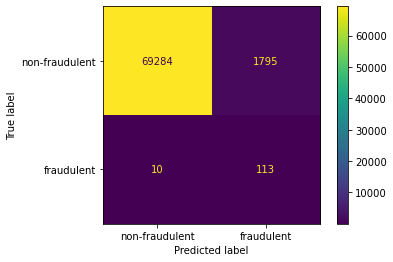

Classification Report: 
                precision    recall  f1-score   support

    fraudulent       1.00      0.97      0.99     71079
non-fraudulent       0.06      0.92      0.11       123

      accuracy                           0.97     71202
     macro avg       0.53      0.95      0.55     71202
  weighted avg       1.00      0.97      0.99     71202

Matthews Correlation Coefficient:  0.22974936601604323
Execution Time for performance computation: 0.11 minutes
---------------------------------
Tuning xgboost...
Best Parameters for xgboost:  {'learning_rate': 0.1, 'max_depth': 5}
Best Score for xgboost:  0.9312088812088813
Model Name: xgboost
Confusion Matrix: 


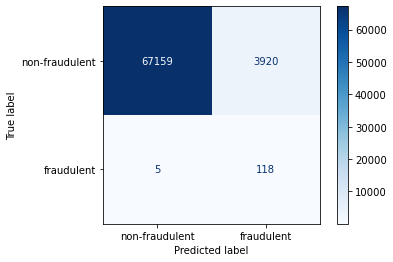

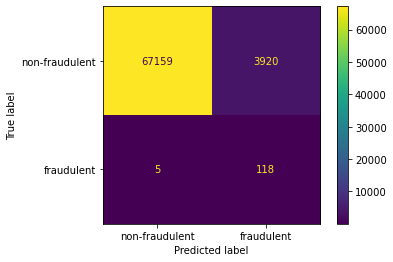

Classification Report: 
                precision    recall  f1-score   support

    fraudulent       1.00      0.94      0.97     71079
non-fraudulent       0.03      0.96      0.06       123

      accuracy                           0.94     71202
     macro avg       0.51      0.95      0.51     71202
  weighted avg       1.00      0.94      0.97     71202

Matthews Correlation Coefficient:  0.16234395809289104
Execution Time for performance computation: 0.04 minutes
---------------------------------
Tuning rforest...
Best Parameters for rforest:  {'max_depth': 5, 'n_estimators': 200}
Best Score for rforest:  0.932055774099932
Model Name: rforest
Confusion Matrix: 


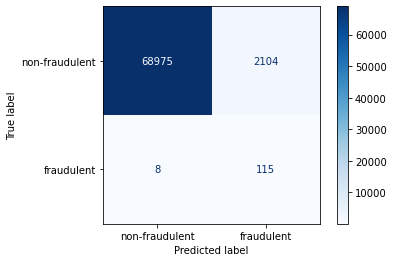

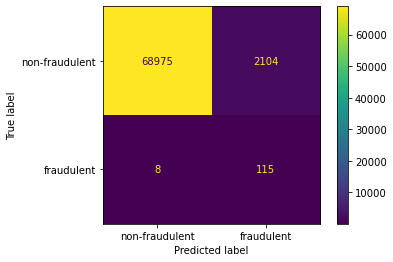

Classification Report: 
                precision    recall  f1-score   support

    fraudulent       1.00      0.97      0.98     71079
non-fraudulent       0.05      0.93      0.10       123

      accuracy                           0.97     71202
     macro avg       0.53      0.95      0.54     71202
  weighted avg       1.00      0.97      0.98     71202

Matthews Correlation Coefficient:  0.21636853054949268
Execution Time for performance computation: 0.07 minutes
---------------------------------


In [24]:
# Loop through each model and tune its hyperparameters using GridSearchCV
for model_name, (model, param_grid) in models.items():
    print(f'Tuning {model_name}...')
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='f1')
    grid_search.fit(X_train_RU_FS, y_train_RU_FS)
    print(f'Best Parameters for {model_name}: ', grid_search.best_params_)
    print(f'Best Score for {model_name}: ', grid_search.best_score_)
    best_model = grid_search.best_estimator_
    compute_performance(best_model, model_name, X_train_RU_FS, y_train_RU_FS, k_best_features_mi_test, y_test)
    print('---------------------------------')

Model Name: SVM
Confusion Matrix: 


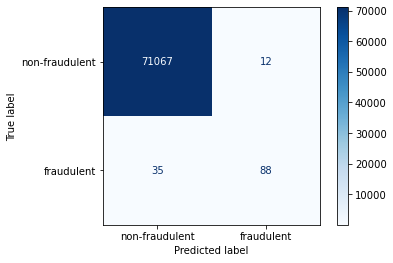

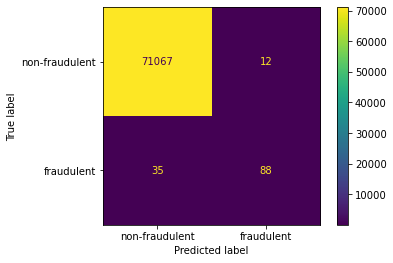

Classification Report: 
                precision    recall  f1-score   support

    fraudulent       1.00      1.00      1.00     71079
non-fraudulent       0.88      0.72      0.79       123

      accuracy                           1.00     71202
     macro avg       0.94      0.86      0.89     71202
  weighted avg       1.00      1.00      1.00     71202

Matthews Correlation Coefficient:  0.7931537257575824
Execution Time for performance computation: 0.02 minutes
---------------------------------


In [30]:
#SVM separate due to computational time
compute_performance(SVM, 'SVM',  X_train_RU_FS, y_train_RU_FS, k_best_features_mi_test, y_test)
print('---------------------------------')